In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 21.6 MB/s eta 0:00:00


In [ ]:
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 128293 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [ ]:
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
import os
import sys
import urllib.request
import json
import pandas  as pd

In [ ]:
df = pd.read_csv('다이소_유튜브_제목.csv')
df

,Unnamed: 0,0
0,0,다이소 드디어 출시 💯 / 매장에 있다면 무조건 사세요 💁🏻 / 사용하면 누구나 만...
1,1,[💖3월 4주차 다이소 신상품 1탄💖] 귀염뽀짝 뽀글이 곰돌이🐻 파우치 그리고 마이...
2,2,다이소 백화점 1층부터 12층까지 싹 쓸어왔다!! 갯수만 80개..😱🔥 게시자: 옐...
3,3,다이소 몰아보기 품절되기 전에 구매각 다이소추천템 살림추천템 득템하시라 게시자: 세...
4,4,다이소 추천템 30가지 몰아보기🌷/ 2배속 다이소 꿀템 모음 1탄🍯/ 다이소 방문전...
...,...,...
616,616,다이소 소품으로 스크리블 펜 아트 스케치로 표현하기 게시자: 쉬엠의 리얼리즘 1일 ...
617,617,다이소 천원핵꿀템🍯 언박싱 미니칼 완전 편리템! #제품리뷰 #shorts 게시자: ...
618,618,다이소(?)깡 사기 #shors #다이소깡 #사기 게시자: 김솔림 9시간 전 1분 1초
619,619,다이소 집단장 청소해봄 추천템 #다이소 #신상품 #추천템 게시자: 귀촌을 꿈꾸는 엄...


In [ ]:
df.columns =['index','제목']

In [ ]:
del df['index']

In [ ]:
df

,제목
0,다이소 드디어 출시 💯 / 매장에 있다면 무조건 사세요 💁🏻 / 사용하면 누구나 만...
1,[💖3월 4주차 다이소 신상품 1탄💖] 귀염뽀짝 뽀글이 곰돌이🐻 파우치 그리고 마이...
2,다이소 백화점 1층부터 12층까지 싹 쓸어왔다!! 갯수만 80개..😱🔥 게시자: 옐...
3,다이소 몰아보기 품절되기 전에 구매각 다이소추천템 살림추천템 득템하시라 게시자: 세...
4,다이소 추천템 30가지 몰아보기🌷/ 2배속 다이소 꿀템 모음 1탄🍯/ 다이소 방문전...
...,...
616,다이소 소품으로 스크리블 펜 아트 스케치로 표현하기 게시자: 쉬엠의 리얼리즘 1일 ...
617,다이소 천원핵꿀템🍯 언박싱 미니칼 완전 편리템! #제품리뷰 #shorts 게시자: ...
618,다이소(?)깡 사기 #shors #다이소깡 #사기 게시자: 김솔림 9시간 전 1분 1초
619,다이소 집단장 청소해봄 추천템 #다이소 #신상품 #추천템 게시자: 귀촌을 꿈꾸는 엄...


In [ ]:
udaiso_text = ''
for temp in df['제목']:
    udaiso_text += str(temp)
udaiso_text = re.sub(r'[^가-힣a-zA-Z0-9]',' ',udaiso_text)
udaiso_text

'다이소 드디어 출시     매장에 있다면 무조건 사세요      사용하면 누구나 만족하는 살림템 5가지   daiso best top 5    게시자  살림남 The Life 1일 전 6분 2초   3월 4주차 다이소 신상품 1탄   귀염뽀짝 뽀글이 곰돌이  파우치 그리고 마이멜로디  헬로키티까지  이번에도 다양한 상품들 준비완료    게시자  다이소 2주 전 2분 15초 다이소 백화점 1층부터 12층까지 싹 쓸어왔다   갯수만 80개     게시자  옐언니 26분 전 22분 다이소 몰아보기 품절되기 전에 구매각 다이소추천템 살림추천템 득템하시라 게시자  세정CLEAN 5일 전 28분 다이소 추천템 30가지 몰아보기   2배속 다이소 꿀템 모음 1탄   다이소 방문전에 꼭 보세요  게시자  민지리뷰 2주 전 26분 다이소 그릇 괜찮을까  게시자  세리세라 2일 전 12분 37초 다이소 지금 당장 달려가세요     모두가 찾아 헤맨다는 필수템      이제는 이것까지 팔아요   daiso best top 5    게시자  살림남 The Life 8일 전 7분 12초 다이소 출시 후 매출 급상승 중인 다이소 품절 대란 추천템 5가지  백종원도 아직 못 찾은 다이소 신상 주방템부터 입고 즉시 품절되는 다이소 꿀템  찐살림템 베스트셀러 생활용품 게시자  쉼플살림 The simple living 5일 전 9분 34초 다이소 직원도 없어서 못사요     매장에 있다면 일단 꼭 사오세요      모두가 찾고 있는 살림템   daiso best top 5    게시자  살림남 The Life 2주 전 7분 30초 10 000  유용한 다이소 진짜 꿀템 11가지   직원들도 사간다고  게시자  장박사의 구매중독 1개월 전 6분 4초 직원들만 몰래 산다는 다이소 꿀템 5가지 다이소 다이소 추천템 다이소 꿀템 다이소 신상 주방용품 이편한살림 게시자  이편한살림 EasyLiving 2개월 전 9분 41초 SUB  다이소 추천템  각 부문별 최고의 베스트3     이거 없으면 꼭 

In [ ]:
from konlpy.tag import Okt
import re
from collections import Counter
from wordcloud import WordCloud

# Okt 함수를 이용해 형태소 분석
okt = Okt()
line =[]

line = okt.pos(udaiso_text)

print(line)

n_adj =[]
# 명사 또는 형용사인 단어만 n_adj에 넣어주기
for word, tag in line:
    if tag in ['Noun','Adjective']:
        if len(word) > 1:
            n_adj.append(word)
# 명사 또는 형용사인 단어 및 2글자 이상인 단어 선택 시
# n_adj = [word for wor

[('다이소', 'Noun'), ('드디어', 'Adverb'), ('출시', 'Noun'), ('매장', 'Noun'), ('에', 'Josa'), ('있다면', 'Adjective'), ('무조건', 'Noun'), ('사세요', 'Verb'), ('사용', 'Noun'), ('하면', 'Verb'), ('누구', 'Noun'), ('나', 'Josa'), ('만족하는', 'Adjective'), ('살림', 'Noun'), ('템', 'Noun'), ('5', 'Number'), ('가지', 'Noun'), ('daiso', 'Alpha'), ('best', 'Alpha'), ('top', 'Alpha'), ('5', 'Number'), ('게시', 'Noun'), ('자', 'Suffix'), ('살림', 'Noun'), ('남', 'Noun'), ('The', 'Alpha'), ('Life', 'Alpha'), ('1일', 'Number'), ('전', 'Noun'), ('6분', 'Number'), ('2초', 'Number'), ('3월', 'Number'), ('4', 'Number'), ('주차', 'Noun'), ('다이소', 'Noun'), ('신', 'Modifier'), ('상품', 'Noun'), ('1', 'Number'), ('탄', 'Verb'), ('귀염', 'Noun'), ('뽀짝', 'Noun'), ('뽀글이', 'Noun'), ('곰돌이', 'Noun'), ('파우치', 'Noun'), ('그리고', 'Conjunction'), ('마이', 'Noun'), ('멜로디', 'Noun'), ('헬로키티', 'Noun'), ('까지', 'Josa'), ('이번', 'Noun'), ('에도', 'Josa'), ('다양한', 'Adjective'), ('상품', 'Noun'), ('들', 'Suffix'), ('준비', 'Noun'), ('완료', 'Noun'), ('게시', 'Noun'), ('자', 'Suffix'), ('다이소

In [ ]:
#제외할 단어 추가
stop_words = "다이소 게시 개월" #추가할 때 띄어쓰기로 추가해주기
stop_words = set(stop_words.split(' '))
# 불용어를 제외한 단어만 남기기
n_adj = [word for word in n_adj if not word in stop_words]
n_adj
#가장 많이 나온 단어 100개 저장
counts = Counter(n_adj)
tags = counts.most_common(100)
tags

[('추천', 261),
 ('살림', 211),
 ('꿀템', 186),
 ('가지', 126),
 ('리뷰', 76),
 ('품절', 65),
 ('신상', 62),
 ('정리', 59),
 ('후회', 55),
 ('용품', 48),
 ('구매', 46),
 ('주방', 38),
 ('가성', 38),
 ('출시', 36),
 ('캠핑', 36),
 ('즉시', 35),
 ('직원', 35),
 ('보이', 33),
 ('만들기', 33),
 ('제품', 32),
 ('급상승', 27),
 ('매출', 26),
 ('무조건', 25),
 ('생활용품', 25),
 ('수납', 25),
 ('생활', 24),
 ('몰래', 23),
 ('꿀팁', 23),
 ('상품', 22),
 ('호랭', 22),
 ('베스트셀러', 20),
 ('가기', 20),
 ('지금', 19),
 ('베스트', 19),
 ('활용', 19),
 ('청소', 19),
 ('영상', 19),
 ('사용', 18),
 ('라이프', 18),
 ('짤컷', 18),
 ('일상', 17),
 ('로그', 17),
 ('인기', 17),
 ('가면', 17),
 ('쇼핑', 16),
 ('모음', 15),
 ('당장', 15),
 ('대란', 15),
 ('대박', 15),
 ('아이템', 15),
 ('이건', 15),
 ('브이', 14),
 ('성비', 14),
 ('고민', 14),
 ('매장', 13),
 ('있는', 12),
 ('산다', 12),
 ('천원', 12),
 ('바로', 12),
 ('셀러', 12),
 ('화장품', 12),
 ('남자', 12),
 ('포장', 12),
 ('보기', 11),
 ('주방용품', 11),
 ('없는', 11),
 ('자취', 11),
 ('소비', 11),
 ('야할', 11),
 ('물건', 11),
 ('보고', 11),
 ('욕실', 11),
 ('후기', 11),
 ('뷰티', 11),
 ('방법', 11),
 ('준비',

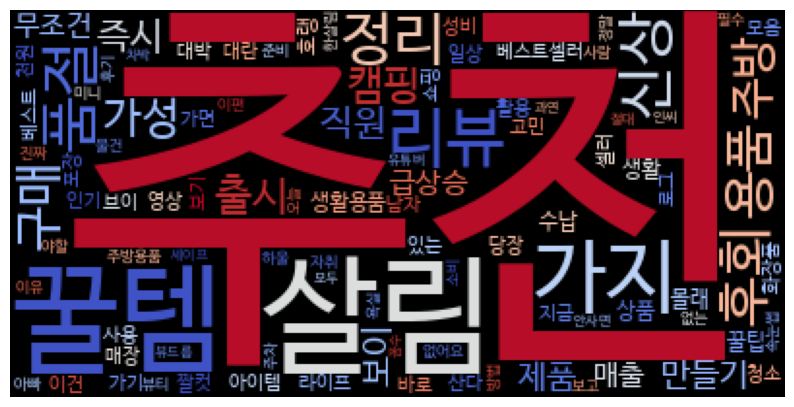

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
word_cloud = WordCloud(font_path=path, background_color='black',max_font_size=400,colormap='coolwarm').generate_from_frequencies(dict(tags))

# 사이즈 설정 및 화면에 출력
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
#워드클라우드 사진으로 저장
plt.savefig('다이소_유튜브_제목_워드클라우드.png', bbox_inches='tight')
plt.show()